### Q1. What is Gradient Boosting Regression?


Gradient Boosting Regression, often referred to as Gradient Boosting Machines (GBM), is a powerful machine learning technique used for regression tasks. It belongs to the family of ensemble methods, where multiple weak learners (typically decision trees) are combined to create a strong predictive model. Gradient Boosting Regression, specifically, is used for modeling and predicting continuous numeric values, making it a popular choice for regression problems.

Here's how Gradient Boosting Regression works:

1. **Base Model:** GBM starts with an initial model, typically a simple one, like a single decision tree with a fixed depth. This initial model serves as a weak learner.

2. **Residual Calculation:** GBM identifies the errors or residuals between the actual target values and the predictions made by the initial model.

3. **Building Ensembles:** A new weak learner (decision tree) is trained to predict the residuals from the previous step. The new model focuses on the errors made by the initial model and aims to correct them.

4. **Update Predictions:** The predictions from the new weak learner are added to the predictions of the initial model to improve the overall model's predictions. The process of updating predictions by learning from residuals is repeated iteratively.

5. **Gradient Descent:** GBM uses a gradient descent-like approach to minimize the loss function, optimizing the model to predict the target values more accurately with each iteration.

6. **Stopping Criteria:** GBM continues this iterative process until a predefined stopping criteria are met, such as the number of weak learners or a specified level of performance improvement.

The result is an ensemble of multiple decision trees, each of which is focused on correcting the errors made by the previous trees. The combined model provides a highly accurate and robust prediction for regression tasks.

Some popular implementations of Gradient Boosting Regression include Gradient Boosting Machines (GBM), XGBoost, LightGBM, and CatBoost. These libraries provide efficient and optimized implementations of the algorithm, making it easy to use in various regression problems.

### Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.


In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
#generating data for simple linear regression
np.random.seed(1)

X=np.random.randn(1000,1)  
w=np.random.randn()
b=np.random.randn()

y=X*w+b +(np.random.randn(1000,1)*0.09)  #this last term of np.random.randn() is to add noise in data

In [3]:
# Splitting Test and Train Data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)
X_train.shape, X_test.shape

((700, 1), (300, 1))

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_arr = scaler.fit_transform(X_train)
X_test_arr= scaler.transform(X_test)

y_arr = scaler.fit_transform(y_train)
y_test_arr= scaler.transform(y_test)


## Manual Gradient Boosting Code

In [5]:
from sklearn.tree import DecisionTreeRegressor

#---------------------------------------------------------------------------------------------------------
#Loss func
def loss_calc(y_true,y_pred):
    
    loss = (1/len(y_true)) * 0.5*np.sum(np.square(y_true-y_pred))
        
    return loss

#---------------------------------------------------------------------------------------------------------
#Gradient Calc
def gradient_calc(y_true,y_pred):
    
    grad = -(y_true-y_pred)
    
    return grad

#---------------------------------------------------------------------------------------------------------
#The base estimator
def tree_creator(r_state,X,y):
    
    d_tree = DecisionTreeRegressor(random_state=r_state,criterion='squared_error',
                                    max_depth=2,min_samples_split=5,
                                    min_samples_leaf=5,max_features=3)
    d_tree.fit(X,y)
    
    return d_tree

#---------------------------------------------------------------------------------------------------------
#Predicting through gradient boosting regression
def predict_grad_boost(models_tray,alpha,test_x=X_test_arr,train_y=y_arr):
    
    initial_pred = np.array([np.mean(train_y)] * len(test_x))
        
    final_pred = initial_pred.reshape(len(initial_pred),1)
    #print(final_pred.shape)
    
    for i in range(len(models_tray)):
        
        model = models_tray[i]
        temp_pred = (model.predict(test_x)).reshape(len(test_x),1)
        #print(temp_pred.shape)
        final_pred -= alpha * temp_pred
    
    return final_pred

In [6]:
def grad_boost_train(train_x,train_y,alpha=0.01,r_state=100,n_iters=101):

    model_tray = [] #Tray to collect the trained boosted stage estimators
    loss_counter = [] #Tray for loss capture

    
    initial_pred = np.array([np.mean(train_y)] * len(train_y))

    print('Initial val :',initial_pred.shape)
    model_pred = initial_pred.reshape(len(initial_pred),1)

    for epoch in range(n_iters): #Unit iteration

        if epoch%100==0:
            print('#---------- Epoch number :',epoch,' -----------#')
        
        #Calculating loss
        loss = loss_calc(y_true=train_y,
                         y_pred=model_pred)

        loss_counter.append(loss)
        
        #Calculating the gradient (residuals)
        grads = gradient_calc(y_true=train_y,
                              y_pred=model_pred)
        #print(grads.shape)
        #Building the regression tree on the gradient (residuals)
        tree_grad = tree_creator(r_state=r_state,
                                 X=train_x,
                                 y=grads)
        #print(train_x.shape)
        #print(tree_grad.predict(train_x).shape)
        
        #Predicting the residuals according to the tree fit above
        pred_m = (tree_grad.predict(train_x)).reshape(len(train_x),1)
        
        #Updating model through learning rate
        model_pred -= alpha * pred_m
        
        #Appending the model into tray
        model_tray.append(tree_grad)
        
    return model_tray,loss_counter,initial_pred


In [7]:
#-----------------------------------------------------------------------------------------------------------------------
#Defining some hyper-params
n_estimators = 1001 #No of boosting steps
alpha =0.01 #Learning rate

#Training gradient boosting regression
models_list,loss_counter,initial_pred = grad_boost_train(train_x=X_arr,
                                                         train_y=y_arr,
                                                         alpha=alpha,
                                                         r_state=100,
                                                         n_iters=n_estimators)


Initial val : (700,)
#---------- Epoch number : 0  -----------#
#---------- Epoch number : 100  -----------#
#---------- Epoch number : 200  -----------#
#---------- Epoch number : 300  -----------#
#---------- Epoch number : 400  -----------#
#---------- Epoch number : 500  -----------#
#---------- Epoch number : 600  -----------#
#---------- Epoch number : 700  -----------#
#---------- Epoch number : 800  -----------#
#---------- Epoch number : 900  -----------#
#---------- Epoch number : 1000  -----------#


### Plotting the Loss curve (There should be a decrease in training loss over boosting rounds)

[Text(0.5, 0, 'Number of boosting rounds'),
 Text(0, 0.5, 'Loss'),
 Text(0.5, 1.0, 'Loss vs Boosting rounds plot')]

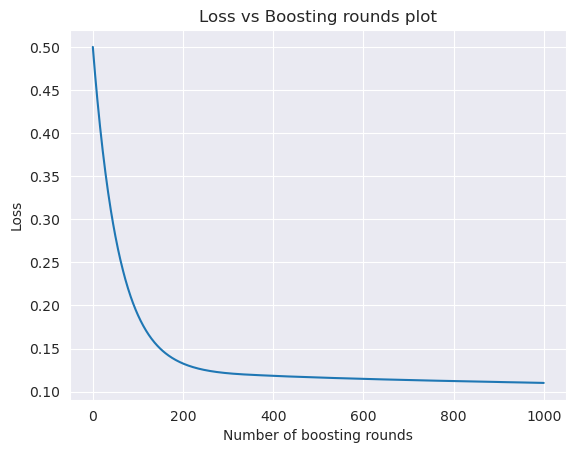

In [8]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(n_estimators),y=loss_counter)
ax.set(xlabel='Number of boosting rounds',ylabel='Loss',title='Loss vs Boosting rounds plot')

### Predicting on the test dataset using the manual training above (Only the trained residual models are passed)

In [9]:
manual_gbm_pred = predict_grad_boost(models_tray=models_list, #Passing the fitted estimators into the predict function
                                     alpha=alpha, #The alpha val used during training
                                     test_x=X_test_arr) #Test dataset
manual_gbm_pred.shape

(300, 1)

### Evaluating the predictions from the manual gradient boosting model

In [30]:
print('MSE of test set :',mean_squared_error(y_test_arr,manual_gbm_pred))
print('RMSE of test set :',np.sqrt(mean_squared_error(y_test_arr,manual_gbm_pred)))
print('R2 score of test set :',r2_score(y_test_arr,manual_gbm_pred))

MSE of test set : 0.295785342825056
RMSE of test set : 0.5438615107038335
R2 score of test set : 0.6919340773160432


### Benchmarking against sklearn implementation of gradient boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

skl_gbm = GradientBoostingRegressor(random_state=100,n_estimators=1001,criterion='squared_error',
                                    max_depth=2,min_samples_split=5,
                                    min_samples_leaf=5,max_features=3)

#-------------------------------------------------------------------------------
skl_gbm.fit(X_arr,y_arr)
skl_pred = skl_gbm.predict(X_test_arr)

#-------------------------------------------------------------------------------
print('MSE of test set :',mean_squared_error(y_test_arr,skl_pred))
print('RMSE of test set :',np.sqrt(mean_squared_error(y_test_arr,skl_pred)))
print('R2 score of test set :',r2_score(y_test_arr,skl_pred))

MSE of test set : 0.33899806530461823
RMSE of test set : 0.5822354036853292
R2 score of test set : 0.6469272250656739


Final Comments :
    
The manual implementation of the gradient boosting algorithm is providing similar results to its sklearn counterpart 


### Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters


In [13]:
from sklearn.model_selection import RandomizedSearchCV
model = GradientBoostingRegressor()
params  = {
    'loss':['squared_error', 'absolute_error'],
    'learning_rate':[0.1,0.01,1],
    'n_estimators':[10,20,40,50,70,80,100,120,150,200],
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf': [1, 3, 4],
    'max_depth':[1,2,4,6,8],
    'max_features':['sqrt', 'log2']
    }

In [14]:
random_cv = RandomizedSearchCV(estimator = model,param_distributions = params,
               n_iter = 100, cv = 5 ,verbose = 3, scoring='neg_mean_squared_error')

In [15]:
random_cv.fit(X_arr,y_arr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=squared_error, learning_rate=0.01, loss=absolute_error, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=80;, score=-0.492 total time=   0.4s
[CV 2/5] END criterion=squared_error, learning_rate=0.01, loss=absolute_error, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=80;, score=-0.325 total time=   0.4s
[CV 3/5] END criterion=squared_error, learning_rate=0.01, loss=absolute_error, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=80;, score=-0.391 total time=   0.4s
[CV 4/5] END criterion=squared_error, learning_rate=0.01, loss=absolute_error, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=80;, score=-0.532 total time=   0.4s
[CV 5/5] END criterion=squared_error, learning_rate=0.01, loss=absolute_error, max_depth=4, max_features=log2, min_samples_leaf=3

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.01, 1],
                                        'loss': ['squared_error',
                                                 'absolute_error'],
                                        'max_depth': [1, 2, 4, 6, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 20, 40, 50, 70, 80,
                                                         100, 120, 150, 200]},
                   scoring='neg_mean_squared_error', verbose=3)

In [18]:
random_cv.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 1,
 'loss': 'squared_error',
 'learning_rate': 0.1,
 'criterion': 'squared_error'}

In [21]:
random_cv.best_estimator_

GradientBoostingRegressor(criterion='squared_error', max_depth=1,
                          max_features='sqrt', n_estimators=70)

In [22]:
GB = random_cv.best_estimator_

In [23]:
GB.fit(X_arr,y_arr)

GradientBoostingRegressor(criterion='squared_error', max_depth=1,
                          max_features='sqrt', n_estimators=70)

In [24]:
y_pred_best=GB.predict(X_test_arr)

In [29]:
print('MSE of test set :',mean_squared_error(y_test_arr,y_pred_best))
print('RMSE of test set :',np.sqrt(mean_squared_error(y_test_arr,y_pred_best)))
print('R2 score of test set :',r2_score(y_test_arr,y_pred_best))

MSE of test set : 0.28526996724985204
RMSE of test set : 0.5341067002480422
R2 score of test set : 0.7028860360845326


### Hence, after hyperparameter tuning we got an R2 score of 0.7028860360845326


### Q4. What is a weak learner in Gradient Boosting?


- In the context of Gradient Boosting, a weak learner refers to a machine learning model or algorithm that is only slightly better than random guessing for the given problem. Weak learners are typically simple models with limited complexity, such as shallow decision trees or linear models.

- Weak learners are deliberately chosen to be weak because the strength of the Gradient Boosting algorithm comes from the ensemble of multiple such weak learners. These weak learners focus on correcting the errors made by previous models in the ensemble.



### Q5. What is the intuition behind the Gradient Boosting algorithm?



   - The intuition behind the Gradient Boosting algorithm can be summarized as follows:

   1. **Iterative Error Correction:** Gradient Boosting is an ensemble technique that aims to create a strong predictive model by combining multiple weak learners. It works iteratively, where each weak learner focuses on correcting the errors made by the previous ones.

   2. **Sequential Learning:** Weak learners are added sequentially to the ensemble. The first learner starts with an initial approximation, and each subsequent learner tries to reduce the errors (residuals) of the ensemble up to that point.

   3. **Gradient Descent:** Gradient Boosting uses a gradient descent-like approach to minimize the loss function. The new learners are fit to the gradients of the loss function with respect to the ensemble's predictions. This guides the algorithm to move in the direction that reduces the errors.

   4. **Model Combination:** The final prediction is the result of combining the predictions from all weak learners. Each weak learner contributes a part of the prediction, and they are weighted based on their performance.

   5. **Strong Predictive Power:** The ensemble of weak learners, when combined, provides a strong predictive model capable of capturing complex relationships in the data and minimizing the prediction error.

   6. **Robustness:** Gradient Boosting is robust against overfitting because of its sequential and iterative nature. It can learn from errors made by earlier learners and, in some cases, outperform other machine learning algorithms.

   Overall, Gradient Boosting's success lies in its ability to combine simple models in a way that creates a highly accurate and robust predictive model for both classification and regression tasks.

### Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?



   - Gradient Boosting builds an ensemble of weak learners in an iterative and sequential manner. Here's how the algorithm constructs the ensemble:

   1. **Initialization:** Gradient Boosting starts with an initial weak learner, which can be a simple model like a shallow decision tree. The initial model serves as the first base learner in the ensemble.

   2. **Error Calculation:** The algorithm calculates the errors or residuals between the actual target values and the predictions made by the initial model. These errors represent the discrepancies between the model's predictions and the true values.

   3. **Training New Learners:** A new weak learner (e.g., another decision tree) is trained to predict these errors, focusing on the areas where the initial model performed poorly. The new learner is designed to correct the errors made by the previous model.

   4. **Updating Predictions:** The predictions from the new weak learner are added to the predictions of the initial model. This updated ensemble of models aims to provide better predictions, with the new learner addressing the errors made by the previous one.

   5. **Gradient Descent:** Gradient Boosting uses a gradient descent-like approach to optimize the ensemble's predictions. It adjusts the new learner's parameters to minimize the loss function, guiding the model in the direction that reduces the errors.

   6. **Iterative Process:** Steps 3 to 5 are repeated for a predefined number of iterations or until a specified stopping criteria are met. Each iteration introduces a new learner that refines the predictions.

   7. **Combining Predictions:** The final prediction is the result of combining the predictions from all weak learners. Each learner contributes to the overall prediction, and their contributions are weighted based on their performance in reducing errors.



### Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?


   - The mathematical intuition behind Gradient Boosting can be summarized in the following steps:

   1. **Initialization:** Start with an initial approximation, which can be a simple model like a decision tree with limited depth.

   2. **Error Calculation:** Calculate the errors or residuals by finding the differences between the actual target values and the predictions made by the initial model.

   3. **Gradient Calculation:** Compute the gradient (partial derivatives) of the loss function with respect to the model's predictions. This gradient represents how the loss would change with small adjustments to the model's predictions.

   4. **Training New Learner:** Train a new weak learner (e.g., another decision tree) to predict the negative gradient, aiming to reduce the errors. This learner is fitted to the residuals of the loss function.

   5. **Update Predictions:** Add the predictions from the new learner to the initial model's predictions. This combined model is closer to the true target values than the initial model.

   6. **Gradient Descent:** The new learner is fitted in the direction of the negative gradient, which minimizes the loss function. It adjusts its parameters to reduce the errors further.

   7. **Iterative Process:** Steps 3 to 6 are repeated for a predefined number of iterations. Each new learner focuses on the remaining errors not yet captured by the ensemble.

   8. **Final Prediction:** The final prediction is the result of combining the predictions from all the learners in the ensemble. The weights of these predictions are determined based on the performance of each learner.

By following these steps, the Gradient Boosting algorithm constructs an ensemble of weak learners that, when combined, provides a powerful and accurate predictive model.